# PLotly

In [ ]:
!pip install chart_studio

In [1]:
# Importar librerias
import pandas as pd
import numpy as np
#import chart_studio.plotly as py
import seaborn as sns
import plotly.express as px
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode,plot,plot, iplot
init_notebook_mode(connected=True)

## Elementos basicos

<Axes: >

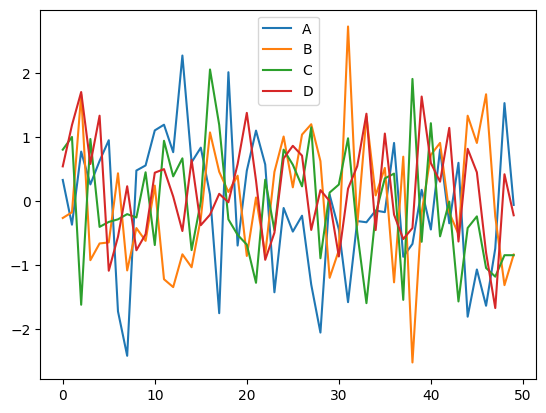

In [2]:
arr= np.random.randn(50,4)
df= pd.DataFrame(arr, columns=['A','B','C','D'])
df.head()
df.plot()

In [3]:
df_stocks = px.data.stocks()
df_stocks

,date,GOOG,AAPL,AMZN,FB,NFLX,MSFT
0,2018-01-01,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,2018-01-08,1.018172,1.011943,1.061881,0.959968,1.053526,1.015988
2,2018-01-15,1.032008,1.019771,1.053240,0.970243,1.049860,1.020524
3,2018-01-22,1.066783,0.980057,1.140676,1.016858,1.307681,1.066561
4,2018-01-29,1.008773,0.917143,1.163374,1.018357,1.273537,1.040708
...,...,...,...,...,...,...,...
100,2019-12-02,1.216280,1.546914,1.425061,1.075997,1.463641,1.720717
101,2019-12-09,1.222821,1.572286,1.432660,1.038855,1.421496,1.752239
102,2019-12-16,1.224418,1.596800,1.453455,1.104094,1.604362,1.784896
103,2019-12-23,1.226504,1.656000,1.521226,1.113728,1.567170,1.802472


In [4]:
# Informacion de datos disponibles: https://plotly.com/python-api-reference/generated/plotly.data.html
# Precio de stocks de ['date', 'GOOG', 'AAPL', 'AMZN', 'FB', 'NFLX', 'MSFT']
# para 2018/2019
px.line(df_stocks, x='date',y='GOOG', labels={'x':'Fecha', 'y':'Precio'})

In [ ]:
px.line?

In [5]:
px.line(df_stocks, x='date', y=['GOOG','AAPL'],labels={'x':'Date','y':'Price'},
        title='Apple vs Google')

In [6]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=df_stocks.date, y=df_stocks.AAPL,
                         mode='lines', name='Apple'))
fig.add_trace(go.Scatter(x=df_stocks.date, y=df_stocks.AMZN,
                         mode='lines+markers', name='Amazon'))
fig.add_trace(go.Scatter(x=df_stocks.date, y=df_stocks.GOOG,
                         mode='lines+markers', name='Google',
                         line=dict(color='firebrick',width=2,
                                   dash='dashdot')))
fig.update_layout(title='Precio de acciones 2018/19',
                  xaxis_title='Precio',yaxis_title='Fecha')

In [10]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=df_stocks.date, y=df_stocks.AAPL,
                         mode='lines', name='Apple'))
fig.add_trace(go.Scatter(x=df_stocks.date, y=df_stocks.AMZN,
                         mode='lines+markers', name='Amazon'))
fig.add_trace(go.Scatter(x=df_stocks.date, y=df_stocks.GOOG,
                         mode='lines+markers', name='Google',
                         line=dict(color='firebrick',width=2,
                                   dash='dashdot')))
fig.update_layout(
    xaxis=dict(showline=True, showgrid=False, showticklabels=True,
               linecolor='rgb(204,204,204)', linewidth=2, ticks='outside',
               tickfont=dict(family='Arial', size=12, color='rgb(82,82,82)')
               ),
               yaxis=dict(showgrid=False, zeroline=False, showline=False,
                          showticklabels=False                   
               ),
               autosize=False,
               margin=dict(
                   autoexpand=False,l=100, r=2, t=110),
                           showlegend=True, plot_bgcolor='white'
        )

# Bar charts

In [11]:
px.data.gapminder()

,country,continent,year,lifeExp,pop,gdpPercap,iso_alpha,iso_num
0,Afghanistan,Asia,1952,28.801,8425333,779.445314,AFG,4
1,Afghanistan,Asia,1957,30.332,9240934,820.853030,AFG,4
2,Afghanistan,Asia,1962,31.997,10267083,853.100710,AFG,4
3,Afghanistan,Asia,1967,34.020,11537966,836.197138,AFG,4
4,Afghanistan,Asia,1972,36.088,13079460,739.981106,AFG,4
...,...,...,...,...,...,...,...,...
1699,Zimbabwe,Africa,1987,62.351,9216418,706.157306,ZWE,716
1700,Zimbabwe,Africa,1992,60.377,10704340,693.420786,ZWE,716
1701,Zimbabwe,Africa,1997,46.809,11404948,792.449960,ZWE,716
1702,Zimbabwe,Africa,2002,39.989,11926563,672.038623,ZWE,716


In [12]:
df_us= px.data.gapminder().query("country=='United States'")
px.bar(df_us, x='year', y='pop')

In [14]:
df_tips= px.data.tips()
px.bar(df_tips, x='day',y='tip',color='sex',
       title='Propinas por genero en cada dia',
       labels={'tip':'Propina', 'day':'Dia de trabajo'})

In [ ]:
df_europe= px.data.gapminder().query("continent == 'Europe' and year == 2007 and pop > 2.e6")
fig=px.bar(df_europe, y='pop', x='country', text='pop', color='country')

In [19]:
#df_europe= px.data.gapminder().query("continent == 'Europe' and year == 2007 and pop > 2.e6")
df_europe= px.data.gapminder().query("continent == 'Europe' and year == 2007 and pop > 2.e6").sort_values(by='pop', ascending=True)
fig=px.bar(df_europe, y='pop', x='country', text='pop', color='country')
fig.update_traces(texttemplate= '%{text:.2s}', textposition='outside')
fig.update_layout(uniformtext_minsize=8)
fig.update_layout(xaxis_tickangle= -45)
fig

# Scatterplot

In [24]:
df_iris= px.data.iris()
px.scatter(df_iris, x='sepal_width', y='sepal_length',color='species', size='petal_length',
           hover_data=['petal_width'])

In [22]:
fig= go.Figure()
fig.add_trace(go.Scatter(
  x=df_iris.sepal_width, y= df_iris.sepal_length, mode='markers',
  marker_color=df_iris.sepal_width, text=df_iris.species, marker=dict(showscale=True)
))
fig.update_traces(marker_line_width= 2, marker_size=10)

# Piecharts

In [27]:
df_america= px.data.gapminder().query("year==2007").query("continent= ='Americas' and (country in ('Colombia','Uruguay','Argentina','Peru','Chile','Brazil','Ecuador','Venezuela','Paraguay','Bolivia'))")
px.pie(df_america, values='pop', names='country', title='Poblacion America',
       color_discrete_sequence= px.colors.sequential.RdBu)

In [28]:
colors=['blue','green','black','purple','red','brown']
fig= go.Figure(data=[go.Pie(labels=['Water','Grass','Normal',
                                    'Psychic','Fire','Ground'],
                            values=[110,90,80,80,70,60])])
fig.update_traces(hoverinfo='label+percent', textfont_size=20,
                  textinfo= 'label+percent',pull=[0.1, 0, 0.2, 0, 0, 0],
                  marker=dict(colors=colors, line=dict(color='#FFFFFF',
                                                       width=2)))

# Histogramas

In [29]:
df_tips= px.data.tips()
px.histogram(df_tips, x='total_bill',color='sex')

# Boxplots

In [30]:
df_tips= px.data.tips()
px.box(df_tips, x='sex', y='tip', points='all')

In [31]:
px.box(df_tips, x='day',y='tip',color='sex')

In [32]:
fig= go.Figure()
fig.add_trace(go.Box(x=df_tips.sex, y=df_tips.tip, marker_color='blue',
                     boxmean='sd'))

In [33]:
df_stocks= px.data.stocks()
fig= go.Figure()
fig.add_trace(go.Box(y=df_stocks.GOOG, boxpoints='all',
                     fillcolor='blue',jitter=0.5,
                     whiskerwidth=0.2))
fig.add_trace(go.Box(y=df_stocks.AAPL, boxpoints='all',
                     fillcolor='red',jitter=0.5,
                     whiskerwidth=0.2))
fig.update_layout(title='Google vs Apple',yaxis=dict(gridcolor='rgb(255,255,255)',
                                                     gridwidth= 3),
                  paper_bgcolor='rgb(243, 243, 243)',
                  plot_bgcolor='rgb(243, 243, 210)')

# Heatmap

In [24]:
f= sns.load_dataset('flights')
fig= px.density_heatmap(f, x='year', y='month',z= 'passengers',
                        marginal_x= 'histogram',
                        marginal_y='histogram')
fig

# Actividad 

In [26]:
!pip install gapminder

In [27]:
from gapminder import gapminder
gapminder.head()

,country,continent,year,lifeExp,pop,gdpPercap
0,Afghanistan,Asia,1952,28.801,8425333,779.445314
1,Afghanistan,Asia,1957,30.332,9240934,820.853030
2,Afghanistan,Asia,1962,31.997,10267083,853.100710
3,Afghanistan,Asia,1967,34.020,11537966,836.197138
4,Afghanistan,Asia,1972,36.088,13079460,739.981106


In [28]:
gapminder.tail()

,country,continent,year,lifeExp,pop,gdpPercap
1699,Zimbabwe,Africa,1987,62.351,9216418,706.157306
1700,Zimbabwe,Africa,1992,60.377,10704340,693.420786
1701,Zimbabwe,Africa,1997,46.809,11404948,792.449960
1702,Zimbabwe,Africa,2002,39.989,11926563,672.038623
1703,Zimbabwe,Africa,2007,43.487,12311143,469.709298


In [29]:
gapminder.year.unique()

array([1952, 1957, 1962, 1967, 1972, 1977, 1982, 1987, 1992, 1997, 2002,
       2007], dtype=int64)

In [30]:
import plotly.express as px
df_x= px.data.gapminder().query("year == 2007")
fig=px.bar(df_x, y='pop', x='country', text='pop', color='country')
fig.update_traces(texttemplate= '%{text:.2s}', textposition='outside')
fig.update_layout(uniformtext_minsize=8)
fig.update_layout(xaxis_tickangle= -45)
fig